In [1]:
!pip install keras_tuner
!pip install keras-tuner
import tensorflow as tf
import keras_tuner as kt
from tensorflow import keras
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 7.6 MB/s eta 0:00:00
Using TensorFlow backend


In [2]:

from keras.datasets import cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Take only 5000 samples from the training set
num_samples = 5000
train_images = train_images[:num_samples]
train_labels = train_labels[:num_samples]

# Take only 5000 samples from the test set
test_images = test_images[:num_samples]
test_labels = test_labels[:num_samples]

# The 'train_images', 'train_labels', 'test_images', and 'test_labels' now contain only 5000 samples each
# Normalize the pixel values to the range [0, 1]
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0


170498071/170498071 [==============================] - 2s 0us/step


In [3]:
import tensorflow as tf
import kerastuner as kt

# Define a function to build the model
def build_model(hp):
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(units=hp.Int('Layer_1', min_value=32, max_value=1024, step=32),activation=hp.Choice('activation_1', values=['relu', 'softmax', 'tanh', 'sigmoid'])),
        tf.keras.layers.Dense(units=hp.Int('Layer_2', min_value=32, max_value=1024, step=32),activation=hp.Choice('activation_2', values=['relu', 'softmax', 'tanh', 'sigmoid'])),
        tf.keras.layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

  # Define a callback to capture validation loss
class ValidationLossCallback(tf.keras.callbacks.Callback):
    def __init__(self):
        super(ValidationLossCallback, self).__init__()
        self.val_losses = []

    def on_epoch_end(self, epoch, logs=None):
        val_loss = logs.get('val_loss')
        self.val_losses.append(val_loss)

<ipython-input-3-2fad5f461c6a>:2: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


In [5]:
random_tuner = kt.tuners.RandomSearch(build_model,objective='val_accuracy',max_trials=5,directory='random_tuner_dir',project_name='mnist_random_tuner')

In [7]:
validation_loss_callback = ValidationLossCallback()
# Search for the best hyperparameters and capture validation loss
random_tuner.search(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))


Trial 5 Complete [00h 00m 08s]
val_accuracy: 0.3529999852180481

Best val_accuracy So Far: 0.3716000020503998
Total elapsed time: 00h 00m 56s


In [ ]:
tuner = random_tuner.tuner
trial_ids = tuner.oracle.trials
trials_hparams=[]
score=[]
for trial_id in trial_ids:
    trial = auto_model.tuner.oracle.get_trial(trial_id)
    trial.best_step
    trial.metrics
    hparams = trial.hyperparameters.values
    score.append(trial.score)
  # Append to list
    trials_hparams.append(hparams)


import pandas as pd
df_random = pd.DataFrame(trials_hparams)
df_random['val_Loss']=score
df_random

AttributeError: ignored

In [8]:
# Capture validation loss for each search trial
all_losses = []

for trial in random_tuner.oracle.get_best_trials(num_trials=50):
    best_hps = trial.hyperparameters
    model = build_model(best_hps)
    validation_loss_callback = ValidationLossCallback()
    history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels), callbacks=[validation_loss_callback])
    val_losses = validation_loss_callback.val_losses
    all_losses.append(val_losses)
    print(f"Validation Loss History for Trial {trial.trial_id}:")
    print(val_losses)


Epoch 1/5
157/157 [==============================] - 3s 9ms/step - loss: 2.1023 - accuracy: 0.2286 - val_loss: 1.9630 - val_accuracy: 0.2906
Epoch 2/5
157/157 [==============================] - 1s 7ms/step - loss: 1.9137 - accuracy: 0.2972 - val_loss: 1.8802 - val_accuracy: 0.3052
Epoch 3/5
157/157 [==============================] - 1s 7ms/step - loss: 1.8101 - accuracy: 0.3422 - val_loss: 1.7947 - val_accuracy: 0.3444
Epoch 4/5
157/157 [==============================] - 1s 8ms/step - loss: 1.7653 - accuracy: 0.3620 - val_loss: 1.8563 - val_accuracy: 0.3216
Epoch 5/5
157/157 [==============================] - 1s 7ms/step - loss: 1.6978 - accuracy: 0.3790 - val_loss: 1.7374 - val_accuracy: 0.3816
Validation Loss History for Trial 3:
[1.9630184173583984, 1.8802123069763184, 1.7946722507476807, 1.8562684059143066, 1.7374497652053833]
Epoch 1/5
157/157 [==============================] - 2s 7ms/step - loss: 2.1686 - accuracy: 0.2086 - val_loss: 1.9499 - val_accuracy: 0.2880
Epoch 2/5
157/15

[[1.9630184173583984,
  1.8802123069763184,
  1.7946722507476807,
  1.8562684059143066,
  1.7374497652053833],
 [1.9499481916427612,
  1.8861265182495117,
  1.8075878620147705,
  1.8976753950119019,
  1.8591208457946777],
 [2.058278799057007,
  1.9252948760986328,
  1.8913757801055908,
  1.8593255281448364,
  1.8554490804672241],
 [1.9585027694702148,
  1.8692033290863037,
  1.878852128982544,
  1.8288896083831787,
  1.84774649143219],
 [2.0051426887512207,
  2.0275721549987793,
  1.910834789276123,
  1.8885619640350342,
  1.8475134372711182]]

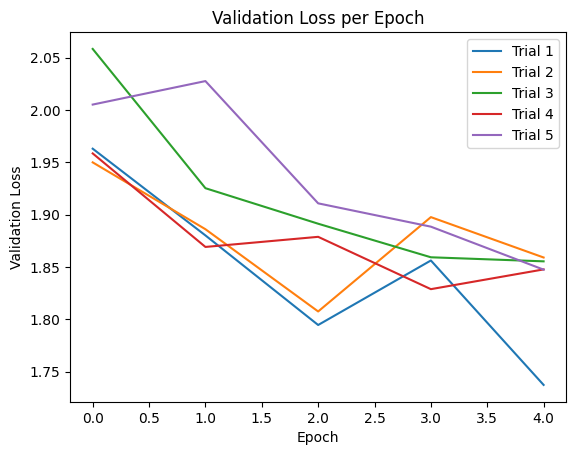

In [12]:
import matplotlib.pyplot as plt
for i, losses in enumerate(all_losses):
    plt.plot(losses, label=f"Trial {i+1}")

plt.xlabel("Epoch")
plt.ylabel("Validation Loss")
plt.legend()
plt.title("Validation Loss per Epoch")

# Show plot
plt.show()

In [ ]:
# Retrieve the best hyperparameters
best_random_hps = random_tuner.get_best_hyperparameters(num_trials=2)

In [ ]:
history = best_random_model.fit(train_images, train_labels, epochs=2, validation_data=(test_images, test_labels))


Epoch 1/2
1875/1875 [==============================] - 7s 4ms/step - loss: 1.4532 - accuracy: 0.3119 - val_loss: 1.4193 - val_accuracy: 0.4101
Epoch 2/2
1875/1875 [==============================] - 8s 4ms/step - loss: 1.3313 - accuracy: 0.3953 - val_loss: 1.3050 - val_accuracy: 0.4176


In [ ]:
print(random_tuner.results_summary)

<bound method BaseTuner.results_summary of <keras_tuner.src.tuners.randomsearch.RandomSearch object at 0x7e71c8399240>>


In [ ]:
# Define the tuner for Bayesian Optimization
bayesian_tuner = kt.tuners.BayesianOptimization(
    build_model,
    objective='val_accuracy',
    max_trials=5,  # Number of trials (Bayesian optimization)
    num_initial_points=2,  # Number of initial random trials
    directory='bayesian_tuner_dir',
    project_name='mnist_bayesian_tuner'
)

# Define the tuner for Hyperband
hyperband_tuner = kt.tuners.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=10,  # Maximum number of epochs for each trial
    factor=3,  # Reduction factor for number of trials
    directory='hyperband_tuner_dir',
    project_name='mnist_hyperband_tuner'
)

In [ ]:
# Search for the best hyperparameters using each tuner
bayesian_tuner.search(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))
hyperband_tuner.search(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

# Retrieve the best hyperparameters for each tuner
best_random_hps = random_tuner.get_best_hyperparameters(num_trials=1)[0]
best_bayesian_hps = bayesian_tuner.get_best_hyperparameters(num_trials=1)[0]
best_hyperband_hps = hyperband_tuner.get_best_hyperparameters(num_trials=1)[0]

# Build and train models with the best hyperparameters for each tuner
best_random_model = random_tuner.hypermodel.build(best_random_hps)
best_bayesian_model = bayesian_tuner.hypermodel.build(best_bayesian_hps)
best_hyperband_model = hyperband_tuner.hypermodel.build(best_hyperband_hps)

best_random_model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))
best_bayesian_model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))
best_hyperband_model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))


In [ ]:
# Train the model with the best hyperparameters for each tuner
history_random = best_random_model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# Access the validation loss history
val_loss_random = history_random.history['val_loss']

# Do the same for the Bayesian and Hyperband models
history_bayesian = best_bayesian_model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))
val_loss_bayesian = history_bayesian.history['val_loss']

history_hyperband = best_hyperband_model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))
val_loss_hyperband = history_hyperband.history['val_loss']


Epoch 1/10
157/157 [==============================] - 1s 6ms/step - loss: 1.0758 - accuracy: 0.6058 - val_loss: 1.8596 - val_accuracy: 0.4066
Epoch 2/10
157/157 [==============================] - 1s 8ms/step - loss: 1.0745 - accuracy: 0.6074 - val_loss: 1.9254 - val_accuracy: 0.4020
Epoch 3/10
157/157 [==============================] - 1s 8ms/step - loss: 1.0437 - accuracy: 0.6232 - val_loss: 1.9231 - val_accuracy: 0.4008
Epoch 4/10
157/157 [==============================] - 1s 10ms/step - loss: 0.9964 - accuracy: 0.6362 - val_loss: 2.0763 - val_accuracy: 0.3818
Epoch 5/10
157/157 [==============================] - 2s 12ms/step - loss: 1.0112 - accuracy: 0.6290 - val_loss: 2.0048 - val_accuracy: 0.3890
Epoch 6/10
157/157 [==============================] - 1s 6ms/step - loss: 0.9575 - accuracy: 0.6466 - val_loss: 2.0061 - val_accuracy: 0.4058
Epoch 7/10
157/157 [==============================] - 1s 8ms/step - loss: 0.9440 - accuracy: 0.6408 - val_loss: 2.0502 - val_accuracy: 0.4058
Epoc

In [ ]:
best_random_hps

In [ ]:
def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.Flatten())

    # Tune the number of units in the first dense layer
    model.add(keras.layers.Dense(units=hp.Int('units', min_value=32, max_value=512, step=32), activation='relu'))

    # Tune the dropout rate
    model.add(keras.layers.Dense(rate=hp.Float('dropout', min_value=0.2, max_value=0.5, step=0.1)))

    model.add(keras.layers.Dense(10, activation='softmax'))

    # Compile the model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model


In [ ]:

def build_model(hp):
    model = keras.Sequential([
        keras.layers.Conv2D(
            filters=hp.Int('conv_1_filter', min_value=128, max_value=256, step=16),
            kernel_size=hp.Choice('conv_1_kernel', values=[3, 5]),
            activation='relu'
        ),
        keras.layers.Conv2D(
            filters=hp.Int('conv_2_filter', min_value=128, max_value=256, step=16),
            kernel_size=hp.Choice('conv_2_kernel', values=[3, 5]),
            activation='relu'
        ),
        keras.layers.Flatten(),
        keras.layers.Dense(
            units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
            activation='relu'
        ),
        keras.layers.Dense(15, activation='softmax')])

    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

    return model

tuner_search= kt.RandomSearch(build_model, objective='val_accuracy',max_trials=5,directory='tune',project_name="cnn model tunning")

NameError: ignored

In [ ]:

def build_model(hp):
    model = keras.Sequential([
        keras.layers.Dense(
            filters=hp.Int('conv_1_filter', min_value=128, max_value=256, step=16),
            kernel_size=hp.Choice('conv_1_kernel', values=[3, 5]),
            activation='relu'
        ),
        keras.layers.Conv2D(
            filters=hp.Int('conv_2_filter', min_value=128, max_value=256, step=16),
            kernel_size=hp.Choice('conv_2_kernel', values=[3, 5]),
            activation='relu'
        ),
        keras.layers.Flatten(),
        keras.layers.Dense(
            units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
            activation='relu'
        ),
        keras.layers.Dense(15, activation='softmax')])

    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

    return model

tuner_search= kt.RandomSearch(build_model, objective='val_accuracy',max_trials=5,directory='tune',project_name="cnn model tunning")